# ホールドアウト

In [91]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [92]:
from sklearn.datasets import load_breast_cancer

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [113]:
cancer = load_breast_cancer()
df_origin = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df_origin['target'] = cancer.target

def holdout_err(test_size):
    err = []
    X_train, X_test, y_train, y_test = train_test_split(df_origin.drop('target',axis=1), df_origin['target'], test_size=test_size)
    
    clf = LogisticRegression()
    clf.fit(X_train, y_train)

    err.append(1 - clf.score(X_test,y_test))
    return err

In [120]:
def list_err(sprit_size):
    return [holdout_err(sprit_size*0.1) for i in range(100)]

In [121]:
def show_err(err):
    err_df = pd.DataFrame(err)

    #pd.DataFrame(np.mean(err,axis=1))
    #pd.DataFrame(np.var(err,axis=1))

    plt.plot(pd.DataFrame(np.mean(err,axis=1)))
    plt.show()

    plt.plot(pd.DataFrame(np.var(err,axis=1)))
    plt.show()

In [122]:
err = [list_err(sprit_size) for sprit_size in range(1,10)]

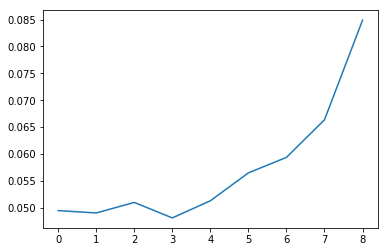

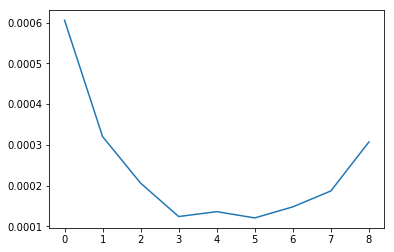

In [124]:
show_err(err)

# CV

In [54]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import KFold

In [55]:
def mean_cross_val(cv):
    cancer = load_breast_cancer()
    logreg = LogisticRegression()
    scores = cross_val_score(logreg, cancer.data, cancer.target, cv=cv)
    return 1 - np.mean(scores)

In [56]:
def cv_err(sprit_size):
    return [mean_cross_val(sprit_size) for i in range(100)]

In [57]:
err = [cv_err(KFold(n_splits=i, shuffle=True)) for i in range(2,11)]

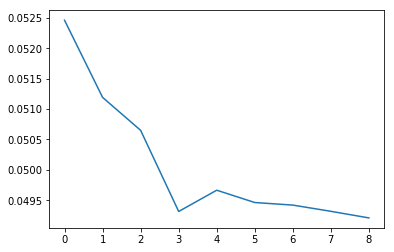

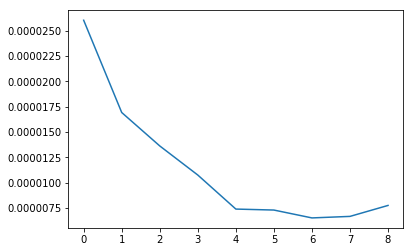

In [58]:
show_err(err)

In [53]:
pd.DataFrame(err)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.947270,0.948987,0.947263,0.943767,0.950791,0.950815,0.950791,0.952576,0.947257,0.945534,...,0.949005,0.945484,0.947282,0.950778,0.947276,0.945490,0.945490,0.948999,0.943767,0.947251
1,0.947294,0.950775,0.949058,0.943739,0.949067,0.950757,0.945540,0.950784,0.947285,0.950812,...,0.942012,0.943758,0.954284,0.954312,0.947294,0.957820,0.949049,0.954302,0.947313,0.952585
2,0.956060,0.936718,0.952539,0.949042,0.954324,0.949042,0.949030,0.949054,0.956035,0.952551,...,0.954312,0.945533,0.952526,0.950790,0.952526,0.956047,0.957870,0.947257,0.949005,0.947331
3,0.952523,0.954277,0.950815,0.957786,0.954200,0.952523,0.956001,0.950753,0.949045,0.947213,...,0.952554,0.950784,0.950846,0.954339,0.949076,0.948968,0.945536,0.950753,0.954355,0.950815
4,0.956047,0.952520,0.950728,0.945465,0.947294,0.948992,0.954293,0.949048,0.947256,0.952538,...,0.954255,0.949011,0.954330,0.949048,0.952464,0.952501,0.950840,0.945577,0.947275,0.950840
5,0.955994,0.945541,0.947241,0.945520,0.952618,0.945563,0.950832,0.952618,0.949047,0.949026,...,0.952532,0.952467,0.952661,0.952553,0.945606,0.949004,0.952596,0.950768,0.949069,0.952618
6,0.949041,0.950778,0.954299,0.952538,0.948993,0.947208,0.949017,0.948993,0.950778,0.952514,...,0.952514,0.950802,0.957771,0.950802,0.952563,0.952489,0.949017,0.950753,0.952563,0.954299
7,0.954282,0.950783,0.950728,0.950893,0.954282,0.956101,0.950976,0.952574,0.949019,0.948936,...,0.954338,0.947448,0.952409,0.950893,0.948964,0.952491,0.954365,0.949129,0.954282,0.950810
8,0.949060,0.949091,0.950752,0.949091,0.947274,0.950815,0.950846,0.949029,0.952538,0.950783,...,0.950846,0.948966,0.949060,0.956046,0.950846,0.950689,0.952632,0.952506,0.952475,0.954355
